# 確率ロボティクス課題
## 強化学習のアルゴリズムの実装

### 17C1100  堂前雅仁

## 課題内容
タイル状のシミュレーション環境を構築し，スタート地点から設定したゴールに向かってロボットが移動するタスクを考える．  
環境内でのロボットの動作を強化学習のアルゴリズムを用いて学習する．

## 実装方法
https://github.com/ryuichiueda/probrobo2017/blob/master/09.ipynb  

上のプログラムを参考にしたタイルワールドの中で,
Q学習をもちいて迷路の座標（0，0）からゴールまでを走破する経路の学習を行う．

In [1]:
class Agent:
    def __init__(self):
        self.actions = ["up","down","left","right"]
        self.pos = (0,0)
        
agent = Agent()

In [2]:
size = 5

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.wall = False
        self.goal = False
        
    def set_wall(self,actions):
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.wall = True
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] = 0.0
        self.goal = True

# タイルワールド内の障害物となる壁やゴールを設定
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[1][0].set_wall(agent.actions)
states[1][4].set_wall(agent.actions)
states[0][2].set_wall(agent.actions)
states[2][4].set_wall(agent.actions)
states[3][3].set_wall(agent.actions)
states[3][1].set_wall(agent.actions)
states[2][0].set_wall(agent.actions)
states[4][4].set_goal(agent.actions)

## 描画
タイルの黒い部分をロボットが通過不可能な障害物として設定．  
左下をスタート地点として右上のゴールとする．

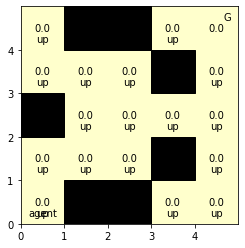

In [3]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    
    t = []
    for i in range(size):
        t_row = []
        for vec in values:
            t_row.append(vec[i])
        t.append(t_row)
        
    
    mp = ax.pcolor(t, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=10)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=10)
            if states[x][y].wall:
                plt.text(x+0.5,y+0.8,"wall",ha = 'center', va = 'center', size=10)
                testx = [x,x,x+1,x+1]
                testy = [y,y+1,y+1,y]
                plt.fill(testx,testy,color="black")
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=10)
    
    if mark_pos == "all":
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=10)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=10)
            
    plt.show()
    fig.clear()
    
draw("all")

In [4]:
import random

def state_transition(s_pos,a):
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
        
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1
    
        
    return (x,y)

In [5]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1:
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

### 学習の条件
#### r : 報酬
* 通常移動 : 1
* 壁に当たる: 4

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:up s':(1, 2)
----
s:(1, 2)　a:up s':(1, 3)
----
s:(1, 3)　a:up s':(1, 3)
----
s:(1, 3)　a:up s':(1, 3)
----
s:(1, 3)　a:down s':(1, 2)
----
s:(1, 2)　a:down s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
---

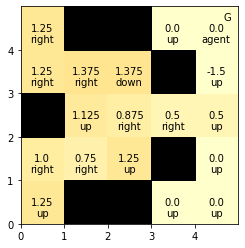

s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:down s':(2, 1)
----
s:(2, 1)　a:down s':(2, 1)
----
s:(2, 1)　a:left s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:left s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:up s':(1, 3)
----
s:(1, 3)　a:up

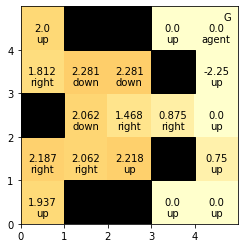

s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


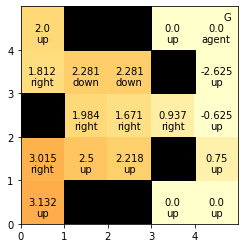

s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


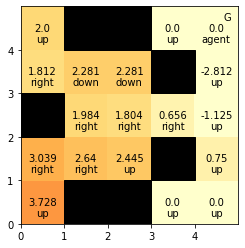

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:down s':(2, 2)
----
s:(2, 2)　a:up s':(2, 3)
----
s:(2, 3)　a:up s':(2, 3)
----
s:(2, 3)　a:up s':(2, 3)
----
s:(2, 3)　a:left s':(2, 3)
----
s:(2, 3)　a:left s':(1, 3)
----
s:(1, 3)　a:left s':(0, 3)
----
s:(0, 3)　a:down s':(0, 3)
----
s:(0, 3)　a:down s':(0, 3)
----
s:(0, 3)　a:right s'

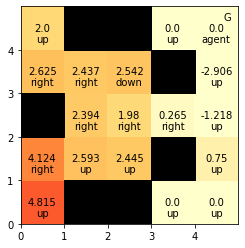

s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:up s':(1, 3)
----
s:(1, 3)　a:up s':(1, 3)
----
s:(1, 3)　a:up s':(1, 3)
----
s:(1, 3)　a:left s':(1, 3)
----
s:(1, 3)　a:left s':(0, 3)
----
s:(0, 3)　a:up s':(0, 4)
----
s:(0, 4)　a:up s':(0, 4)
----
s:(0, 4)　a:up s':(0, 4)
----
s:(0, 4)　a:left s':(0, 4)
----
s:(0, 4)　a:left s':(0, 4)
----
s:(0, 4)　a:right s':(0, 4)
----
s:(0, 4)　a:right s':(0, 4)
----
s:(0, 4)　a:down s':(0, 3)
----
s:(0, 3)　a:left s':(0, 3)
----
s:(0, 3)　a:left s':(0, 3)
----
s:(0, 3)　a:down s':(0, 3)
----
s:(0, 3)　a:down s':(0, 3)
----
s:(0, 3)　a:up s':(0, 4)
----
s:(0, 4)　a:down s':(0, 3)
----
s:(0, 3)　a:right s':(0, 3)
----
s:(0, 3)　a:right s'

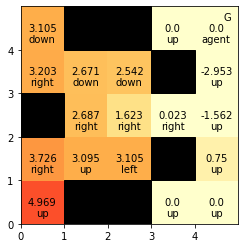

s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


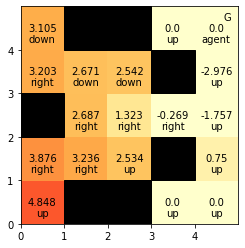

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:up s':(1, 3)
----
s:(1, 3)　a:right s':(2, 3)
----
s:(2, 3)　a:up s':(2, 3)
----
s:(2, 3)　a:up s':(2, 3)
----
s:(2, 3)　a:left s':(1, 3)
----
s:(1, 3)　a:down s':(1, 3)
----
s:(1, 3)　a:down s':(1, 2)
----
s:(1, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


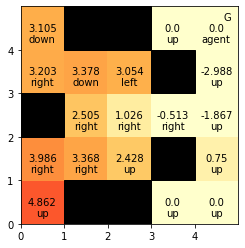

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


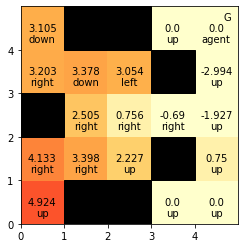

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


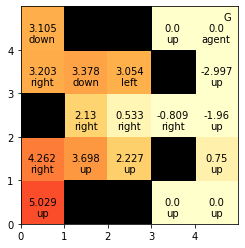

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


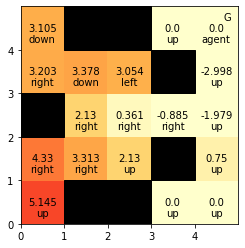

s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:up s':(2, 3)
----
s:(2, 3)　a:down s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


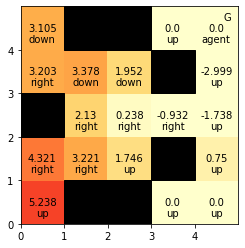

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:down s':(2, 1)
----
s:(2, 1)　a:down s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


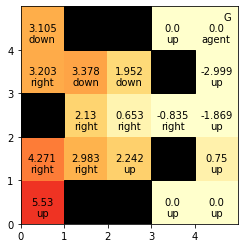

s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


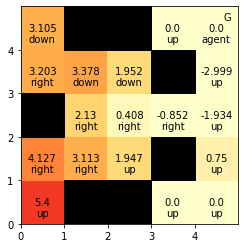

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


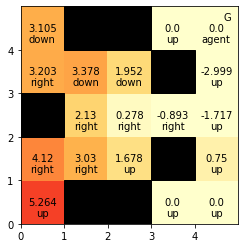

s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


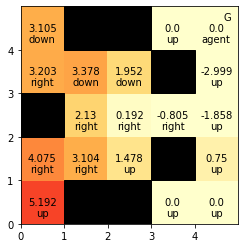

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


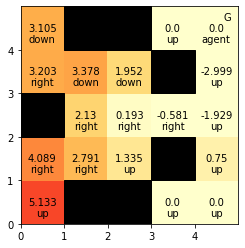

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


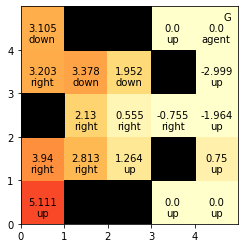

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:down s':(4, 1)
----
s:(4, 1)　a:down s':(4, 0)
----
s:(4, 0)　a:up s':(4, 1)
----
s:(4, 1)　a:left s':(4, 1)
----
s:(4, 1)　a:left s':(4, 1)
----
s:(4, 1)　a:right s':(4, 1)
----
s:(4, 1)　a:right s':(4, 1)
----
s:(4, 1)　a:down s':(4, 0)
----
s:(4, 0)　a:down s':(4, 0)
----
s:(4, 0)　a:down s':(4, 0)
----
s:(4, 0)　a:left s':(3, 0)
----
s:(3, 0)　a:up s':(3, 0)
----
s:(3, 0)　a:up s':(3, 0)
----
s:(3, 0)　a:down s':(3, 0)
----
s:(3, 0)　a:down s':(3, 0)
----
s:(3, 0)　a:left s':(3, 0)
----
s:(3, 0)　a:left s':(3, 0)
----
s:(3, 0)　a:right s':(4, 0)
----
s:(4, 0)　a:right s':(4, 0)
----
s:(4, 0)　a:right s':(4, 0)
----
s:(4, 0)　a:up s':(4, 0)
----
s:(4, 0)　a:

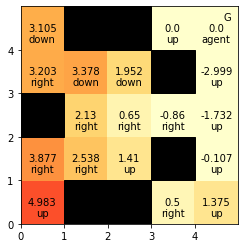

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:down s':(3, 2)
----
s:(3, 2)　a:down s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


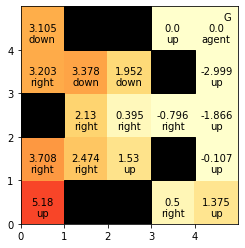

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


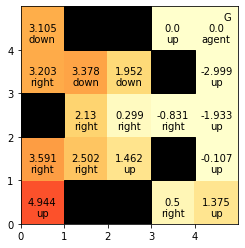

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


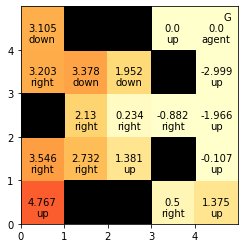

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


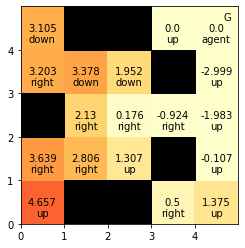

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


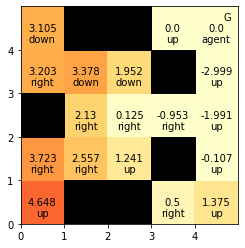

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


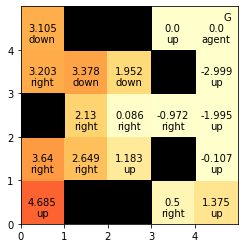

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


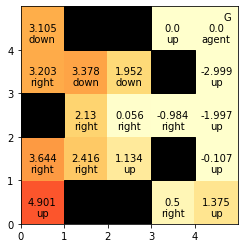

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


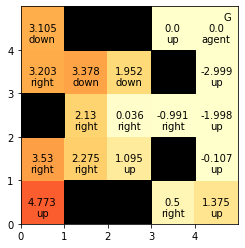

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


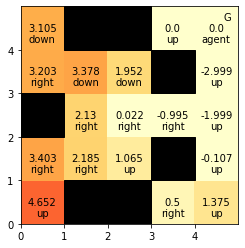

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


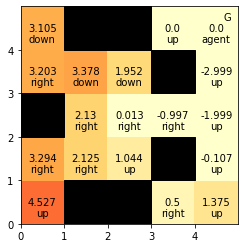

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


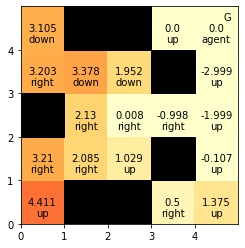

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:left s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


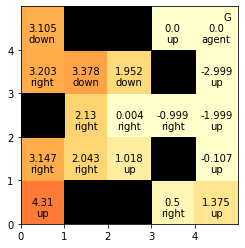

s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


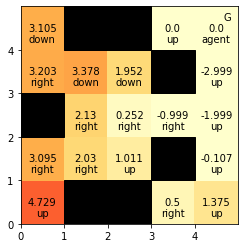

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:down s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


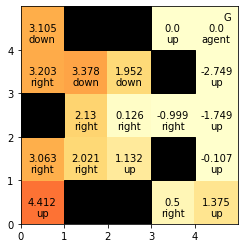

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


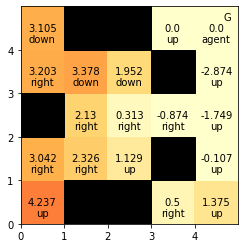

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


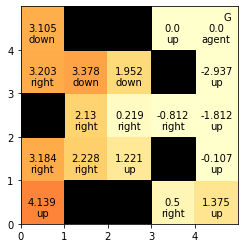

s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


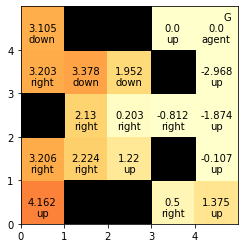

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


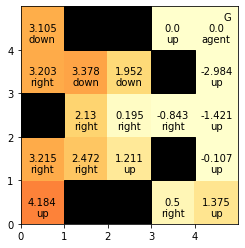

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:up s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


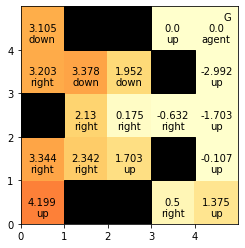

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


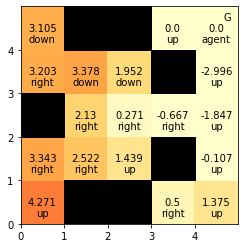

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


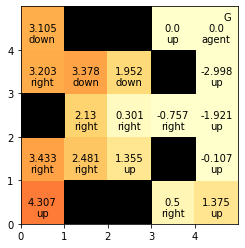

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


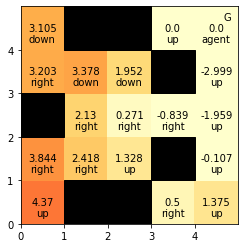

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:down s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


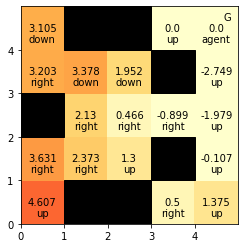

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


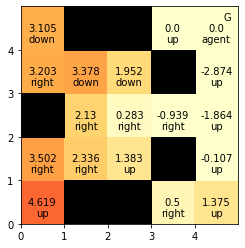

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


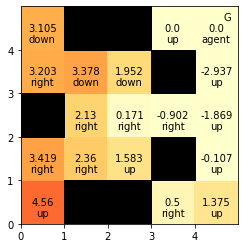

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


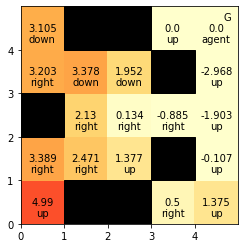

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


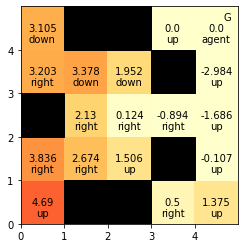

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


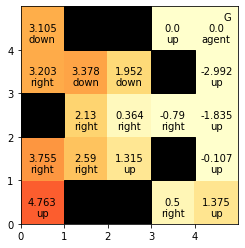

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


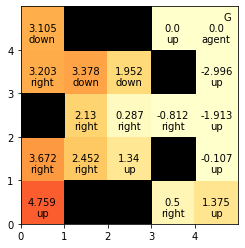

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


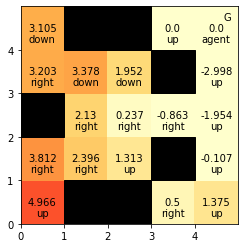

s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


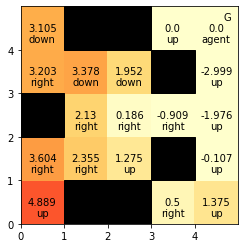

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


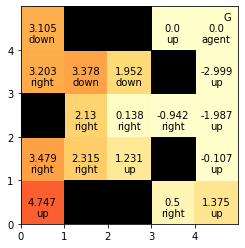

s:(0, 0)　a:left s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:up s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


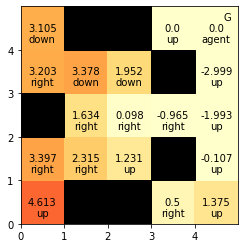

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:up s':(2, 3)
----
s:(2, 3)　a:down s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


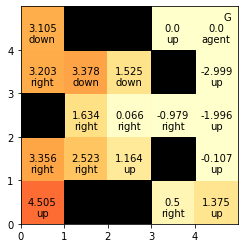

s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:down s':(4, 1)
----
s:(4, 1)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


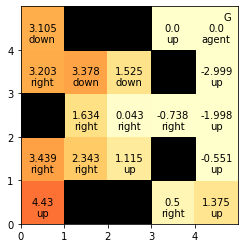

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:left s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


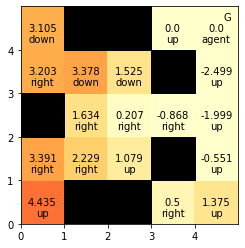

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:left s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


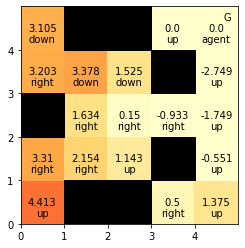

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


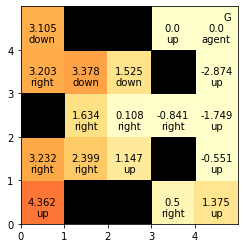

s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


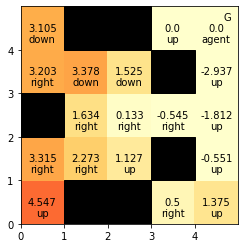

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:down s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:up s':(2, 3)
----
s:(2, 3)　a:down s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


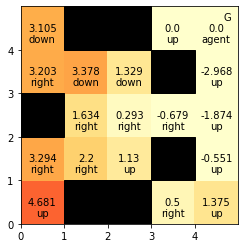

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


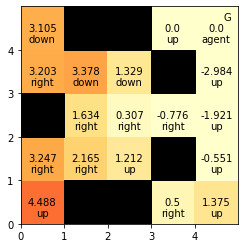

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


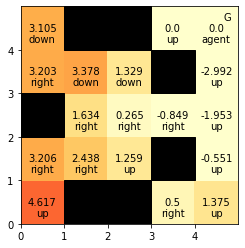

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


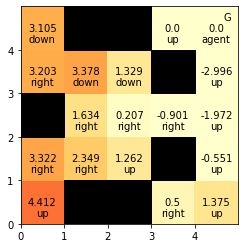

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:down s':(2, 2)
----
s:(2, 2)　a:down s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:right s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


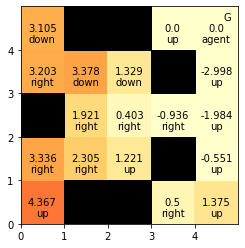

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:up s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


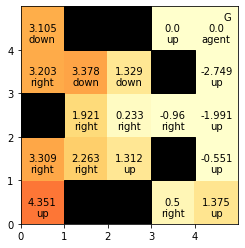

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:left s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


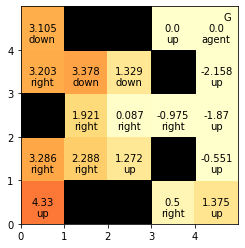

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


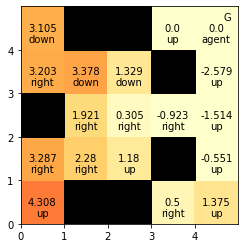

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


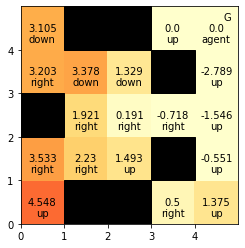

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


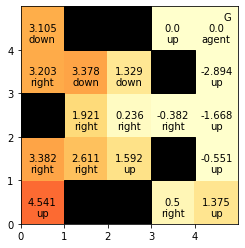

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


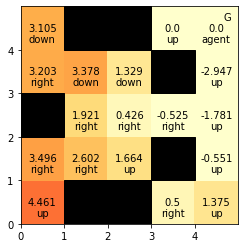

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:left s':(3, 2)
----
s:(3, 2)　a:up s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


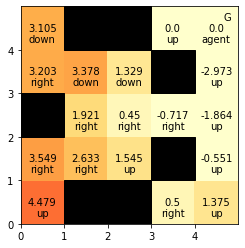

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:up s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


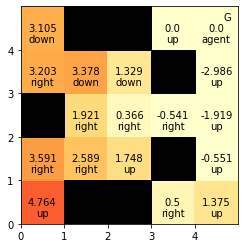

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:down s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


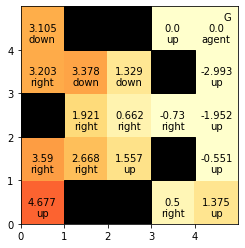

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


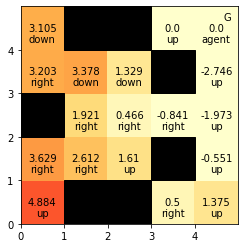

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


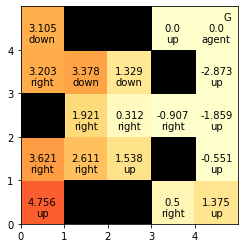

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


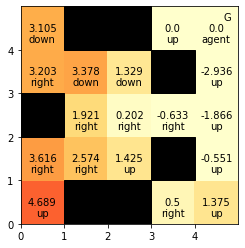

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


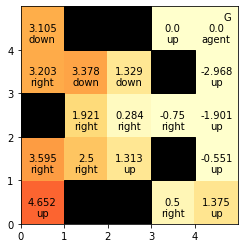

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


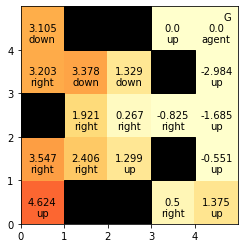

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:right s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


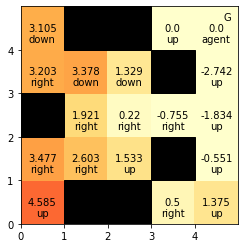

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


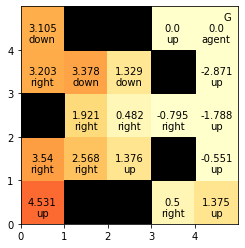

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:down s':(4, 1)
----
s:(4, 1)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


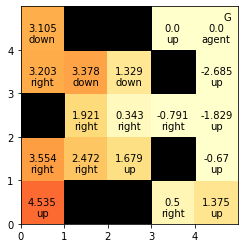

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


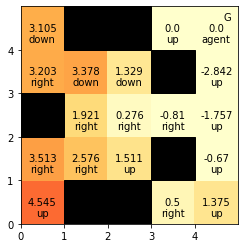

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:left s':(1, 2)
----
s:(1, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


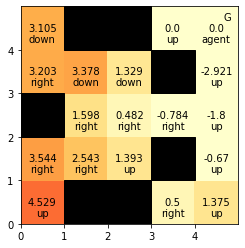

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


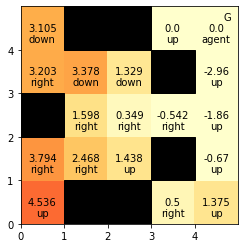

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:up s':(2, 3)
----
s:(2, 3)　a:down s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:down s':(4, 1)
----
s:(4, 1)　a:up s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


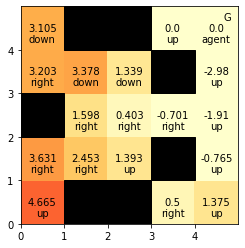

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:down s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


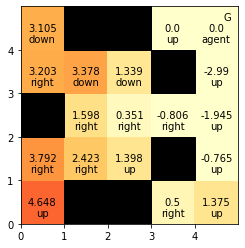

s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:left s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:down s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


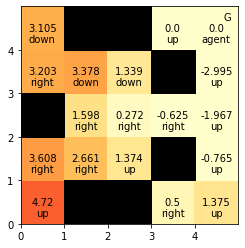

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


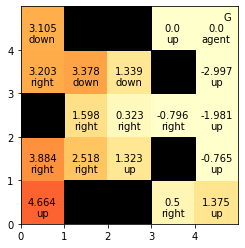

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


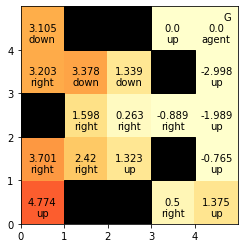

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


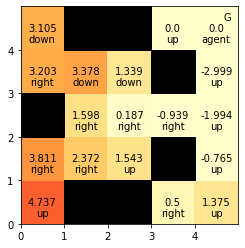

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:up s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


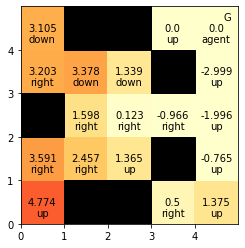

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


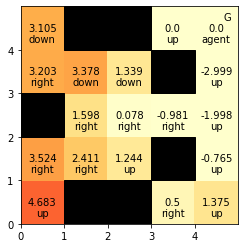

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


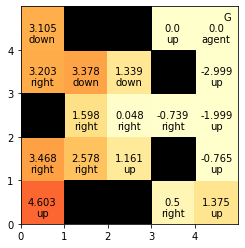

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:down s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


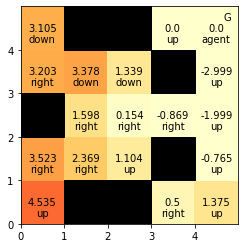

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:left s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


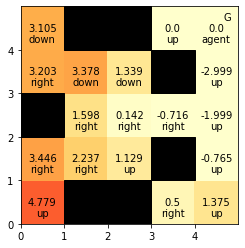

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


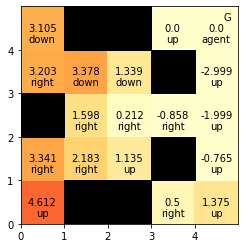

s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


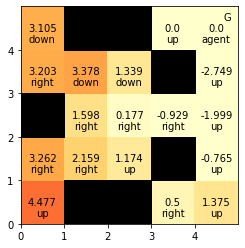

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


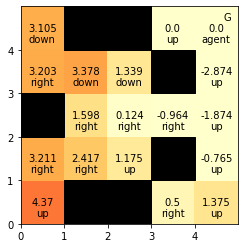

s:(0, 0)　a:up s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 3)
----
s:(4, 3)　a:left s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


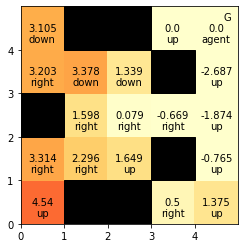

s:(0, 0)　a:right s':(0, 0)
----
s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


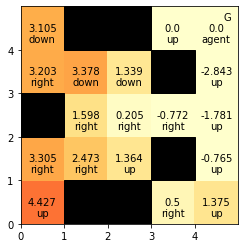

s:(0, 0)　a:up s':(0, 1)
----
s:(0, 1)　a:right s':(1, 1)
----
s:(1, 1)　a:right s':(2, 1)
----
s:(2, 1)　a:up s':(2, 2)
----
s:(2, 2)　a:right s':(3, 2)
----
s:(3, 2)　a:right s':(4, 2)
----
s:(4, 2)　a:up s':(4, 3)
----
s:(4, 3)　a:up s':(4, 4)
----


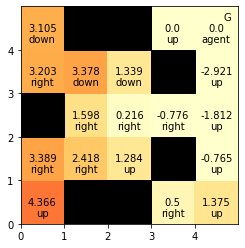

In [6]:
alpha = 0.5
gamma = 1.0

def q_proc(s_pos,a):
    r = 1
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    if states[s_next_pos[0]][s_next_pos[1]].wall == True:
        s_next_pos = s_pos
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    # 価値
    if s_next.wall == True:
        r = 4
    elif s_next.goal == True:
        r = -3
    
    q = (1.0-alpha)*s.Q[a] + alpha * (r + gamma * s_next.Q[s_next.best_action])
    print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos))
    print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos =(0,0)
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
         
    while True:
        s_next, a_next, q = q_proc(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
            
for i in range(100):
    one_trial()
    draw("all")

経路の生成を確認できる．